In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display
import os, sys
from matplotlib.image import imread

names = ['Banana', 'Gaussian_Gamma_1', 'GermanCredit', 'Brownian', 'ItemResponseTheory', 'StochasticVolatility']

In [ ]:
def pandas_matshow(df, x, y, z):

    # Pivot the DataFrame to create a grid
    pivot_table = df.pivot(index=y, columns=x, values=z)

    # Plotting the heatmap
    plt.imshow(pivot_table, cmap='viridis', aspect='auto')  # You can choose other colormaps
    plt.colorbar(label='grads to low bias')

    # Add labels
    plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
    plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    

def pandas_show(df, x, y):
    plt.bar([str(val) for val in np.array(df[x])], np.array(df[y]))
    plt.ylabel('grads to low bias')
    plt.show()
    
def showw(*params):
    
    if len(params)==1:
        x = params[0]
        df = pd.read_csv('img/' + str(x) + '/data.csv', sep= '\t')

        for t in names:
            plt.title(t)
            pandas_show(df, x, 'grads_to_low_bmax_' + t)        
    
    elif len(params) == 2:
        x, y = params 
        df = pd.read_csv('img/' + str(x) + '_' + str(y) + '/data.csv', sep= '\t')

        for t in names:
            plt.title(t)
            pandas_matshow(df, x, y, 'grads_to_low_bmax_' + t)
    else:
        raise ValueError(f'{len(params)} is not implemented.')
    


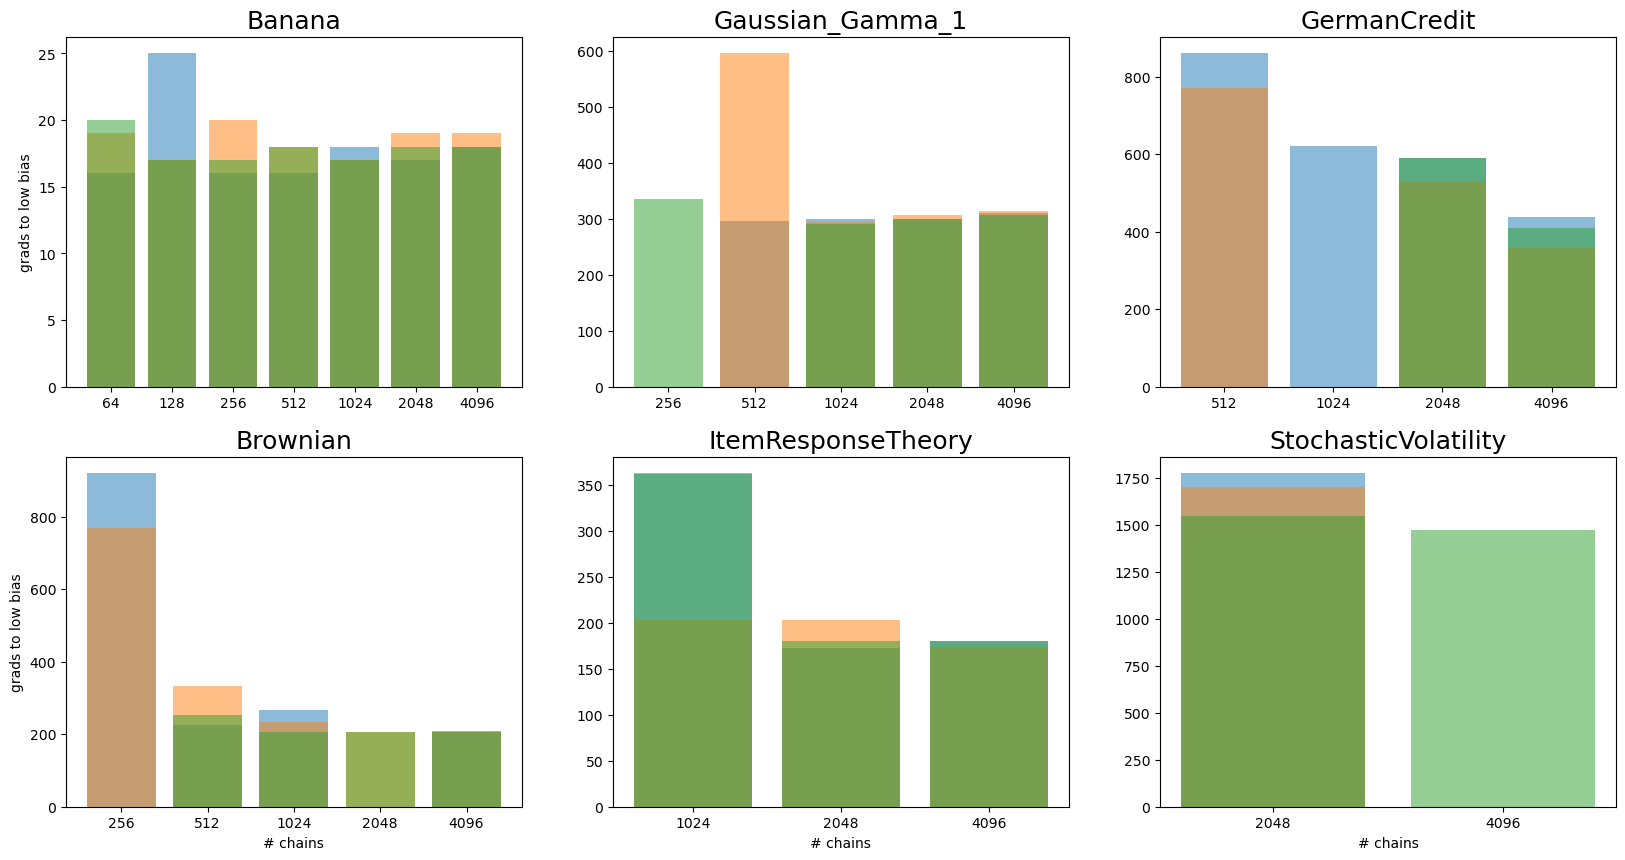

In [20]:
df = [pd.read_csv('img/chains/data'+str(i)+'.csv', sep= '\t') for i in range(3)]

plt.figure(figsize= (20, 10))
for it, t in enumerate(names):
    plt.subplot(2, 3, it+1)
    plt.title(t, fontsize = 18)
    for i in range(3):
        plt.bar([str(val) for val in np.array(df[i]['chains'])], np.array(df[i]['grads_to_low_bmax_' + t]), alpha= 0.5)
    
    if it % 3 == 0:
        plt.ylabel('grads to low bias')
        
    if it > 2:
        plt.xlabel('# chains')
plt.show()

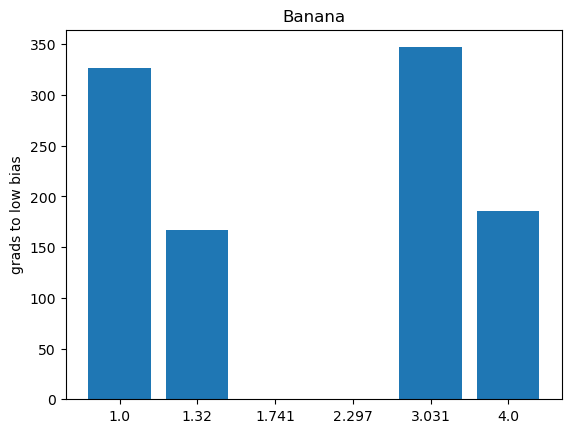

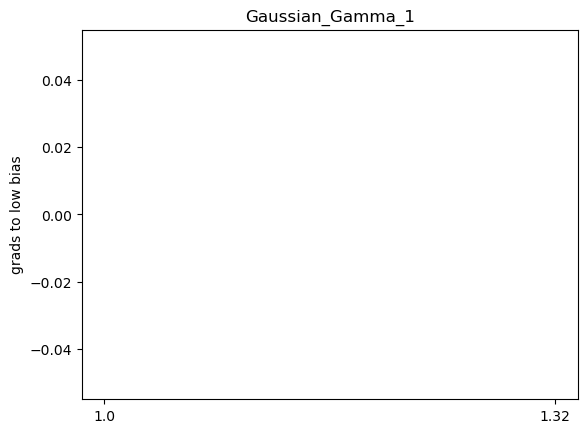

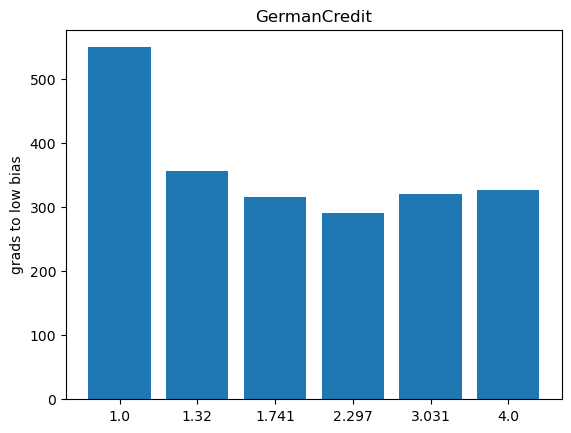

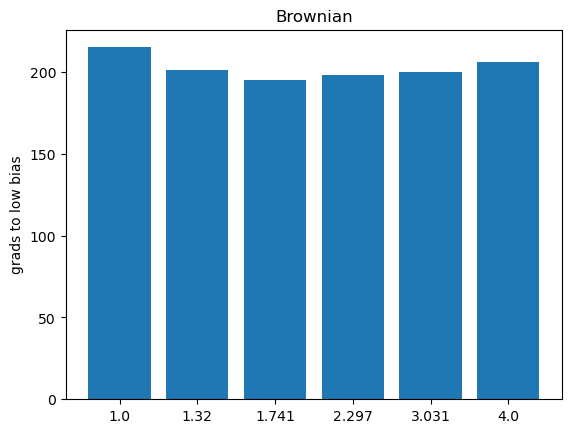

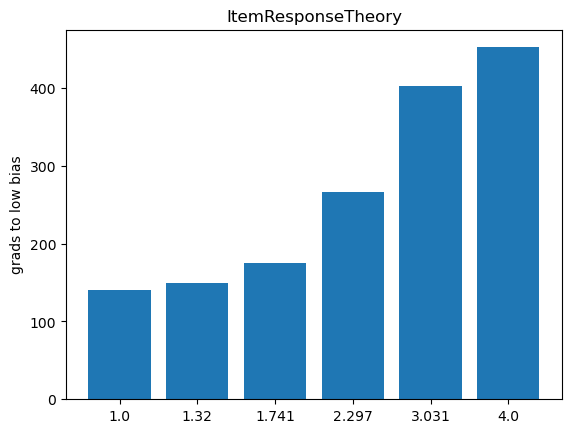

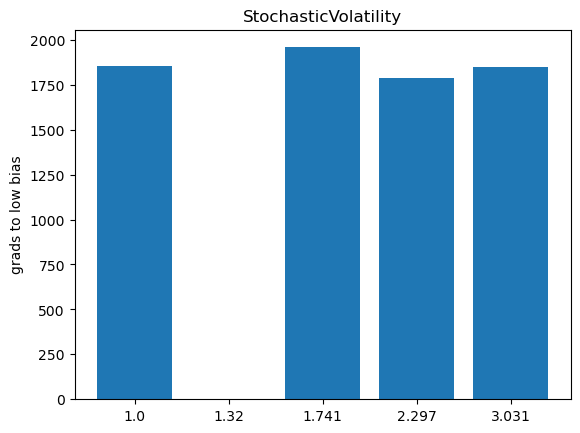

In [3]:
showw('alpha')
